In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import dataset
from sklearn.datasets import load_breast_cancer

# suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('framingham.csv')

In [27]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [28]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [29]:
# read data and clean dataset from Nan  infinity or a value too large for dtype('float64')
def clean_dataset(data):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1.0,58.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,187.0,141.0,81.0,24.96,80.0,81.0,0.0
4232,1.0,68.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,176.0,168.0,97.0,23.14,60.0,79.0,1.0
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [31]:
# labels
y = df['TenYearCHD']

# features
X = df.drop('TenYearCHD', axis=1)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Take note of the imbalance here: there are 557 observations in class 1 and only 3099 in class 0.

### Training

We need the LogisticRegression module from sklearn.linear_model.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

c:\Users\Mohamed Abubakar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Now that the model is trained, we can extract the parameters. The parameters consist of the intercept and the coefficients related to the features. These parameters can be used to predict future target given the features.

Prediction Time
Next we will use the predict method to obtain predictions from our test data observations.

In [ ]:
pred_lr = lr.predict(X_test)

Alright, we've made some predictions. Now we can begin to compare those predictions to the ground truth labels of the test dataset, and determine how well the model has actually done.

### Assessing Model Performance using the Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model, or classifier , on a set of test data for which the true values are known.

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test, pred_lr)

array([[607,   5],
       [116,   4]], dtype=int64)

In [40]:
labels = ['0: No', '1: Yes']

pd.DataFrame(data=confusion_matrix(y_test, pred_lr), index=labels, columns=labels)

,0: No,1: Yes
0: No,607,5
1: Yes,116,4


### Assessing Model Performance using the Classification Report

In [41]:
from sklearn.metrics import classification_report

Similarly to the confusion matrix, the classification matrix takes in two arguments: the unseen y_test data as well as our predictions.

In [42]:
print('Classification Report')
print(classification_report(y_test, pred_lr, target_names=['0: No', '1: Yes']))

Classification Report
              precision    recall  f1-score   support

       0: No       0.84      0.99      0.91       612
      1: Yes       0.44      0.03      0.06       120

    accuracy                           0.83       732
   macro avg       0.64      0.51      0.49       732
weighted avg       0.77      0.83      0.77       732



Let's do a quick analysis of the distribution of observations across our labels.

In [43]:
# Separate minority and majority classes
no_sample = df[df['TenYearCHD']==0]
yes_sample = df[df['TenYearCHD']==1]

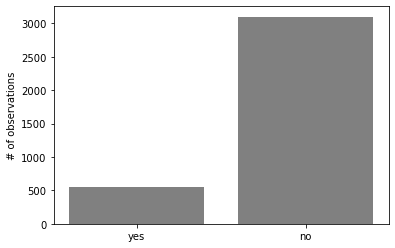

In [44]:
# Get all possible labels
labels = df['TenYearCHD'].unique()
heights = [len(yes_sample),len(no_sample)]
plt.bar(labels,heights,color='grey')
plt.xticks(labels,['yes','no'])
plt.ylabel("# of observations")
plt.show()

In [45]:
# Percentage of no_sample in the dataset 
len(no_sample)/(len(df))

0.8476477024070022

As you can see, our two classes are imbalanced. To put this in perspective as to why this is such an issue, say we had a model that always predicts that a given email is not spam (clearly a really bad model!). Such a model would achieve an accuracy of 85%!

In [46]:
# As usual, we start by importing our modules
from sklearn.utils import resample

#### Approach 1: Upsampling the majority class

In [50]:
# Downsample majority
sample_upsampled = resample(yes_sample,
                          replace=True, # sample without replacement (no need to duplicate observations)
                          n_samples=len(no_sample), # match number in minority class
                          random_state=27) # reproducible results

# Combine downsampled majority class with minority class
downsampled = pd.concat([sample_upsampled, no_sample])

# Check new class counts
downsampled['TenYearCHD'].value_counts()

1    3099
0    3099
Name: TenYearCHD, dtype: int64

In [61]:
# labels
y1 = downsampled['TenYearCHD']

# features
X1 = downsampled.drop('TenYearCHD', axis=1)

In [62]:
# split into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=10)

In [63]:
# create logistic regression model instance
lm = LogisticRegression()

In [64]:
lm.fit(X_train1,y_train1)

LogisticRegression()

In [65]:
pred_lm = lm.predict(X_test1)

In [66]:
print('Classification Report')
print(classification_report(y_test1, pred_lm, target_names=['0: no', '1: yes']))

Classification Report
              precision    recall  f1-score   support

       0: no       0.61      0.61      0.61       614
      1: yes       0.62      0.62      0.62       626

    accuracy                           0.62      1240
   macro avg       0.62      0.62      0.62      1240
weighted avg       0.62      0.62      0.62      1240



In [67]:
# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

# Scale data
X_scaled = scaler.fit_transform(X1)

In [71]:
from sklearn.model_selection import train_test_split

# Split into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y1, test_size=0.2, random_state=10)

In order to have a reference model, we'll build a logistic regression classifier using all the features.

In [70]:
lm_full = LogisticRegression()

In [72]:
# No transformations necessary
lm_full.fit(X_train2, y_train2)

LogisticRegression()

In [73]:
# Generate predictions from full model
pred_lm_full = lm_full.predict(X_test2)

#### Selection by Variance Thresholding

In [74]:
# lm instance for var thresh
lm_vt = LogisticRegression()

In [75]:
# Import the var thresh model and choose a threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.02)

# Transform (i.e.: run selection on) the training data
X_train_vt = selector.fit_transform(X_train2)

In [76]:
X_train_vt.shape

(4958, 8)

Using a variance threshold of 0.02, we have managed to trim the number of features in the training dataset from 16 down to 8.

In [78]:
# Fit model to the transformed data
lm_vt.fit(X_train_vt, y_train2)

LogisticRegression()

In [79]:
# Now we'll need to remove the same features we did in the thresholding process
X_test_vt = selector.transform(X_test2)

# Generate predictions from var thresh model
pred_lm_vt = lm_vt.predict(X_test_vt)

In [80]:
print('Classification Report')
print(classification_report(y_test2, pred_lm_vt, target_names=['0: no', '1: yes']))

Classification Report
              precision    recall  f1-score   support

       0: no       0.69      0.66      0.67       614
      1: yes       0.68      0.71      0.69       626

    accuracy                           0.68      1240
   macro avg       0.68      0.68      0.68      1240
weighted avg       0.68      0.68      0.68      1240



### Selection by Choosing K-Best Features

In [81]:
# lm instance for k-best
lm_kbest = LogisticRegression()

In [123]:
# Import the feature selector module
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=5)

# Transform (i.e.: run selection on) the training data
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)

In [124]:
X_train_kbest.shape

(4958, 5)

In [125]:
# Fit model to the transformed data
lm_kbest.fit(X_train_kbest, y_train)

LogisticRegression()

In [126]:
# Before generating predictions, we'll need to transform the test data the same way we did the train data
X_test_kbest = selector_kbest.transform(X_test)

# Generate predictions from var thresh model
pred_lm_kbest = lm_kbest.predict(X_test_kbest)

In [127]:
print('Classification Report')
print(classification_report(y_test, pred_lm_kbest, target_names=['0: no', '1: yes']))

Classification Report
              precision    recall  f1-score   support

       0: no       0.66      0.66      0.66       614
      1: yes       0.67      0.67      0.67       626

    accuracy                           0.67      1240
   macro avg       0.67      0.67      0.67      1240
weighted avg       0.67      0.67      0.67      1240

